<a href="https://colab.research.google.com/github/Vardhaaaan/Neural-networks-and-Deep-learning-/blob/main/Braintumor_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
train_path = "/kaggle/input/brain-tumor-mri-dataset/Training"
test_path = "/kaggle/input/brain-tumor-mri-dataset/Testing"

classes = os.listdir(train_path)
print('Classes: ', classes)

Classes:  ['pituitary', 'notumor', 'meningioma', 'glioma']


In [6]:
data_info = []
for cls in classes:
    train_count = len(os.listdir(os.path.join(train_path, cls)))
    test_count = len(os.listdir(os.path.join(test_path, cls)))

    data_info.append([cls, train_count, test_count])

df = pd.DataFrame(data_info, columns=["Class", "Train Count", "Test Count"])
print(df)

        Class  Train Count  Test Count
0   pituitary         1457         300
1     notumor         1595         405
2  meningioma         1339         306
3      glioma         1321         300


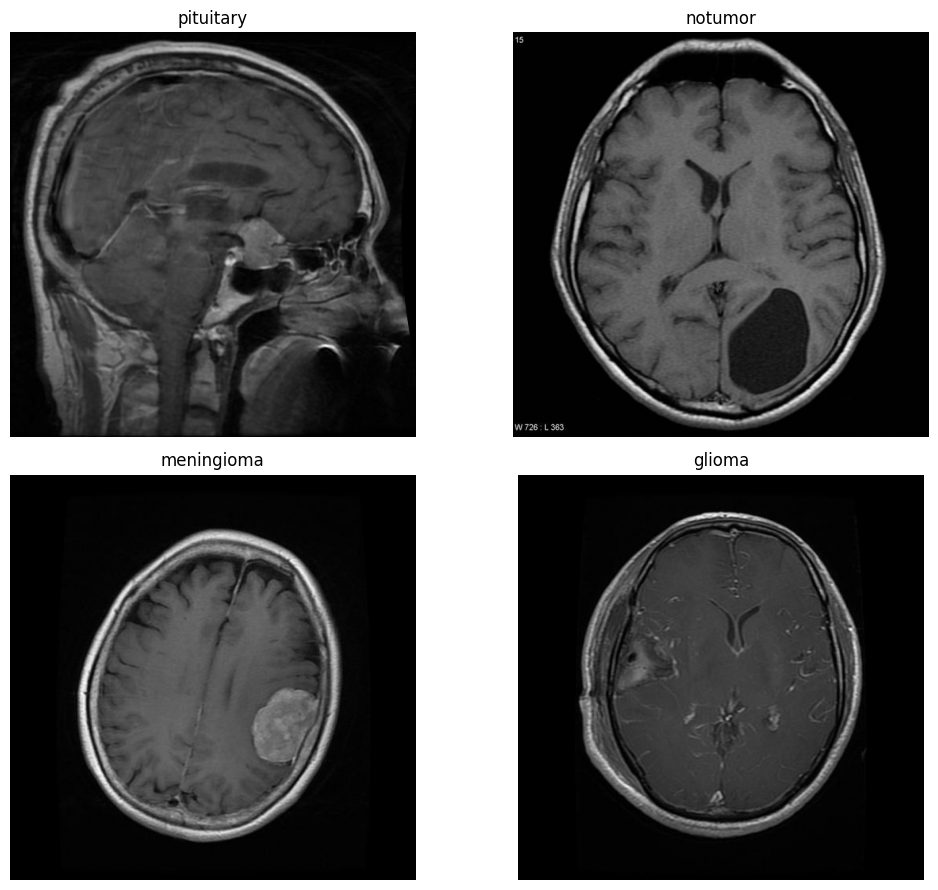

In [7]:
plt.figure(figsize=(11, 9))
for i, cls in enumerate(classes):
    img_path = os.path.join(train_path, cls, random.choice(os.listdir(os.path.join(train_path, cls))))
    img = cv2.imread(img_path, 0)

    plt.subplot(2, 2, i+1)
    plt.imshow(img, 'gray')
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()